In [25]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn')
np.random.seed(0)

In [26]:
# Data Preparation

mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


In [27]:
# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)


(500, 2)
(500, 2)


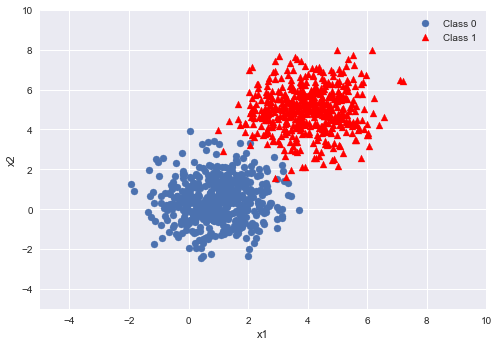

In [28]:
# Data Visualise

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


In [29]:
# Create Training and Test Set

data = np.zeros((1000,4))
print(data.shape)
data[:1000,0] = 1
data[:500,1:3] = dist_01
data[500:,1:3] = dist_02
data[500:,-1] = 1.0

np.random.shuffle(data)
print(data[:5])

split = int(0.8*data.shape[0])

X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(1000, 4)
[[ 1.         -0.73155182 -0.04731375  0.        ]
 [ 1.          2.11412027  2.16594847  0.        ]
 [ 1.          4.77886833  3.80668917  1.        ]
 [ 1.          0.44545363  3.28253268  0.        ]
 [ 1.          2.06100281  5.23700256  1.        ]]
(800, 3) (200, 3)
(800,) (200,)


In [58]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

# accepts input vector x, input weight vector w (different name for theta)
def hypothesis(x,w):
    h = np.dot(x,w)
    return sigmoid(h)

def error_function(y,x,w):
    m = x.shape[0]
    error = 0
    for i in range(m):
        hx = hypothesis(x[i],w)
        error+=(y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx))
    return -error/m

def gradient(y,x,w):
    grad = np.zeros(w.shape[0])
    
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],w)
        grad += (y[i]-hx)*x[i]
    return grad/x.shape[0]


In [59]:
def predict(x,w):
    
    confidence = hypothesis(x,w)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_accuracy(x,y,w):
    
    y_pred = []
    
    for i in range(y.shape[0]):
        p = predict(x[i],w)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    return  float((y_pred==y).sum())/y.shape[0]
def gradient_ascent(x,y,learning_rate = 0.1):
    w = np.zeros(x.shape[1])
    error_list = []
    acc = []
    for i in range(1000):
        error = error_function(y,x,w)
        error_list.append(error)
        grad = gradient(y,x,w)
        w = w + learning_rate*grad
        acc.append(get_accuracy(X_test,Y_test,w))

    return w,error_list,acc,w

In [60]:
final_w,error_list,acc,w = gradient_ascent(X_train,Y_train)

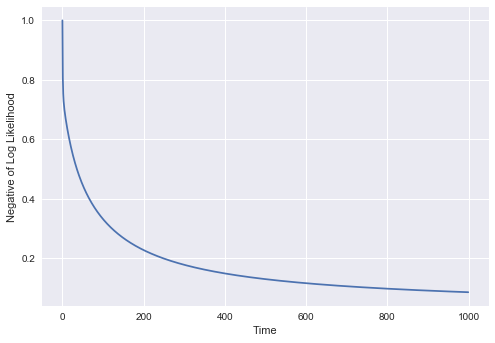

In [61]:
plt.plot(error_list)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

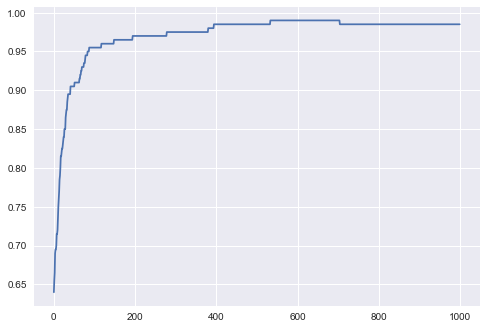

0.985


In [62]:
plt.plot(acc)
plt.show()
print(acc[-1])

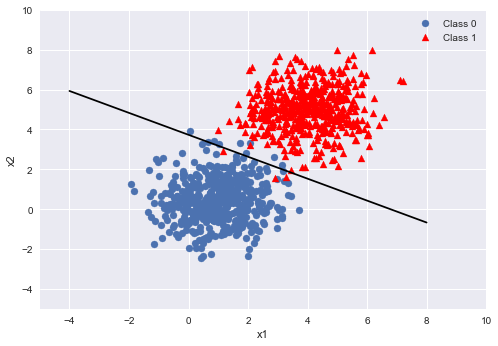

In [63]:
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(w[0]+w[1]*x)/w[2]
plt.plot(x,y,color='k')

plt.legend()
plt.show()


In [64]:
print(w)

[-4.81426292  0.71008805  1.29093218]


In [65]:
print(error_list[:5])

[1.0, 0.8071609966754508, 0.753299035387276, 0.7281000164213345, 0.7118412939795695]
